<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zad15_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LogisticRegression

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [4]:
dataset = pd.read_csv('penguins.csv')
dataset

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


Jednak dane z rowerami

In [7]:
dataset = pd.read_csv('daily-bike-share.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [10]:
X = dataset.drop(['rentals'], axis=1).copy()
y = dataset['rentals'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [11]:
from sklearn.linear_model import ElasticNet
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('scaler_1', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=3)),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('regressor', ElasticNet())])
model_pipeline.fit(X_train, y_train)

from math import sqrt
from sklearn.metrics import mean_squared_error
y_predict_train = model_pipeline.predict(X_train)
y_predict_test = model_pipeline.predict(X_test)
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 453.1600926601016
Test RMSE: 471.0280869329243


Nie dobrze, model się przeuczył

In [12]:
X = dataset.drop(['rentals'], axis=1).copy()
y = dataset['rentals'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [13]:
from sklearn.linear_model import ElasticNet
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('scaler_1', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=3)),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('regressor', ElasticNet())])
model_pipeline.fit(X_train, y_train)

from math import sqrt
from sklearn.metrics import mean_squared_error
y_predict_train = model_pipeline.predict(X_train)
y_predict_test = model_pipeline.predict(X_test)
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 452.7965058869101
Test RMSE: 468.8923886979354


trochę lepiej

In [34]:
X = dataset.drop(['rentals'], axis=1).copy()
y = dataset['rentals'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [33]:
from sklearn.linear_model import ElasticNet
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('scaler_1', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=3)),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

cat_preparation = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('regressor', ElasticNet())])
model_pipeline.fit(X_train, y_train)

from math import sqrt
from sklearn.metrics import mean_squared_error
y_predict_train = model_pipeline.predict(X_train)
y_predict_test = model_pipeline.predict(X_test)
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 447.1266316623616
Test RMSE: 505.7864179565956


In [37]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)
params = {'preprocessor__numeric_preprocessing__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}
final_polynomial_regression_gridsearch = GridSearchCV(model_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21355818.847666122, tolerance: 16521.522725114155
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28112258.87082406, tolerance: 20245.98128949772
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29276476.122552138, tolerance: 19980.030530593605
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: Conv


Najlepsze hiperparametry: {'preprocessor__numeric_preprocessing__polynomialfeatures__degree': 2, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.6000000000000001} 

RMSE: 442.753869330372


Trochę przy tym "rzeźbiłem" i już wiem jak zrobić coś podobnego z danych losowych

In [52]:
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split

np.random.seed(80)
sns.set(font_scale=1.5)


dane = make_moons(n_samples=1500, noise=0.25, random_state=38)
data = dane[0]
target = dane[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')


[[ 0.31634152 -0.17463665]
 [ 0.40505741  0.83134915]
 [ 0.53653167 -0.18791055]
 [ 0.75688407  0.32862948]
 [ 0.81525567  0.10158797]]

[1 0 1 0 0]



Granice decyzyjne

In [53]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head(10)

,x1,x2,target
0,0.316342,-0.174637,1.0
1,0.405057,0.831349,0.0
2,0.536532,-0.187911,1.0
3,0.756884,0.328629,0.0
4,0.815256,0.101588,0.0
5,1.064682,-0.320850,1.0
6,0.552996,0.751299,0.0
7,-0.144287,-0.035171,1.0
8,1.612627,-0.189790,1.0
9,-1.121193,0.937893,0.0


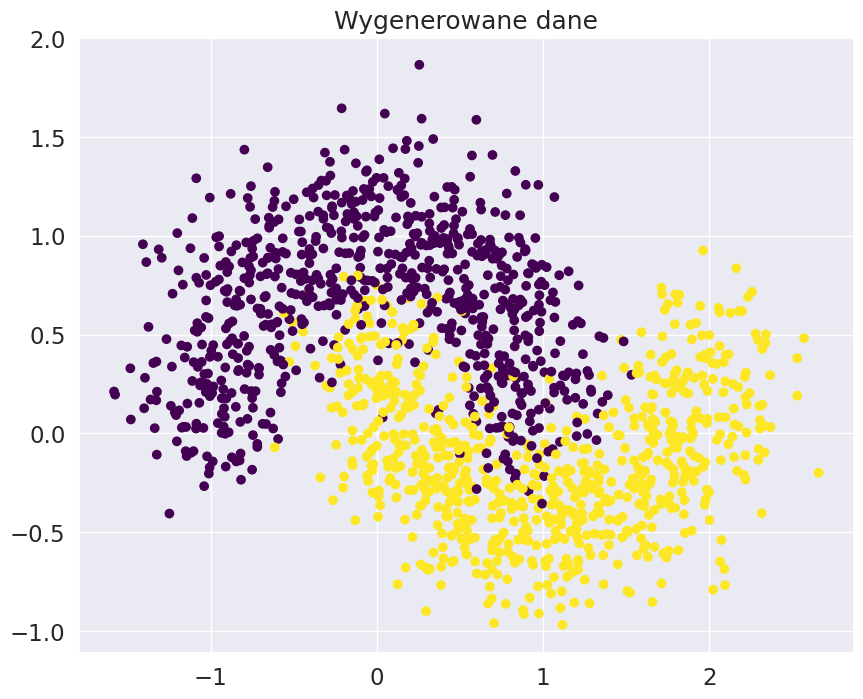

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wygenerowane dane')
plt.show()

In [55]:

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1125, 2)
X_test shape: (375, 2)
y_train shape: (1125,)
y_test shape: (375,)


Wizualizacja zbiorów

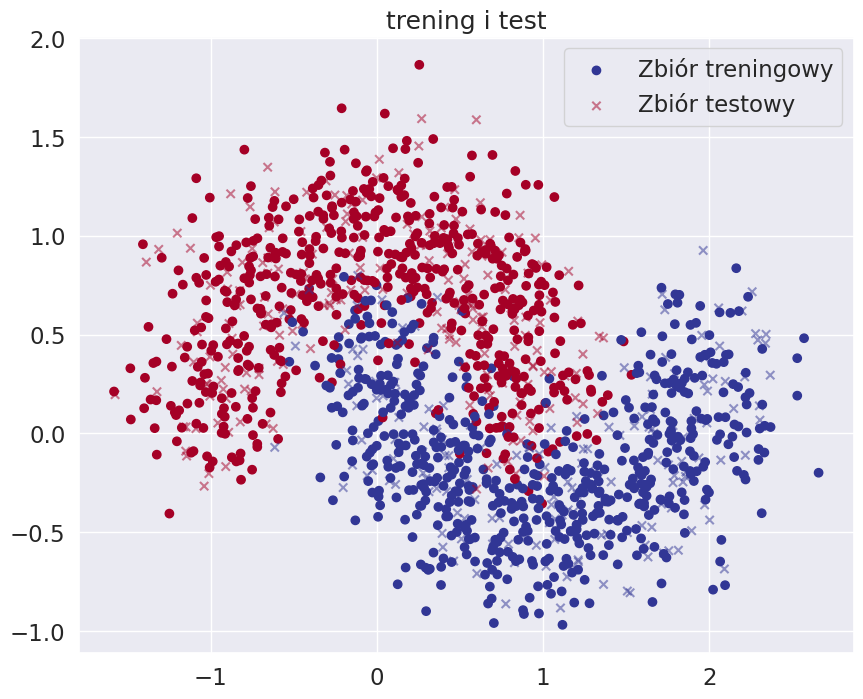

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'Zbiór treningowy')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker = 'x', alpha=0.5, label = 'Zbiór testowy')
plt.legend()
plt.title('trening i test')
plt.legend()
plt.show()


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

Najlepsze parametry

In [61]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 8}

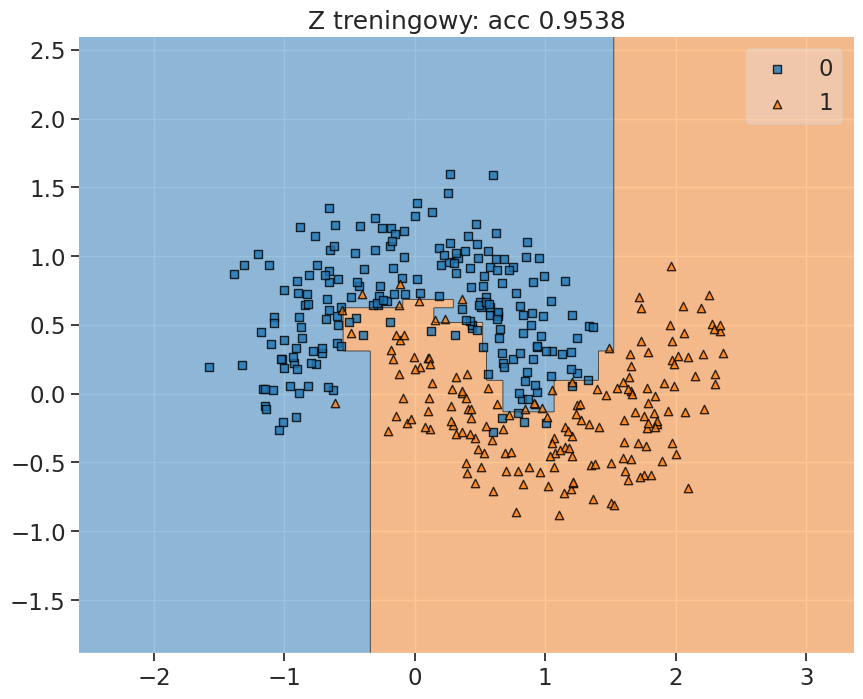

In [63]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Z treningowy: acc {grid_search.score(X_train, y_train):.4f}')
plt.show()


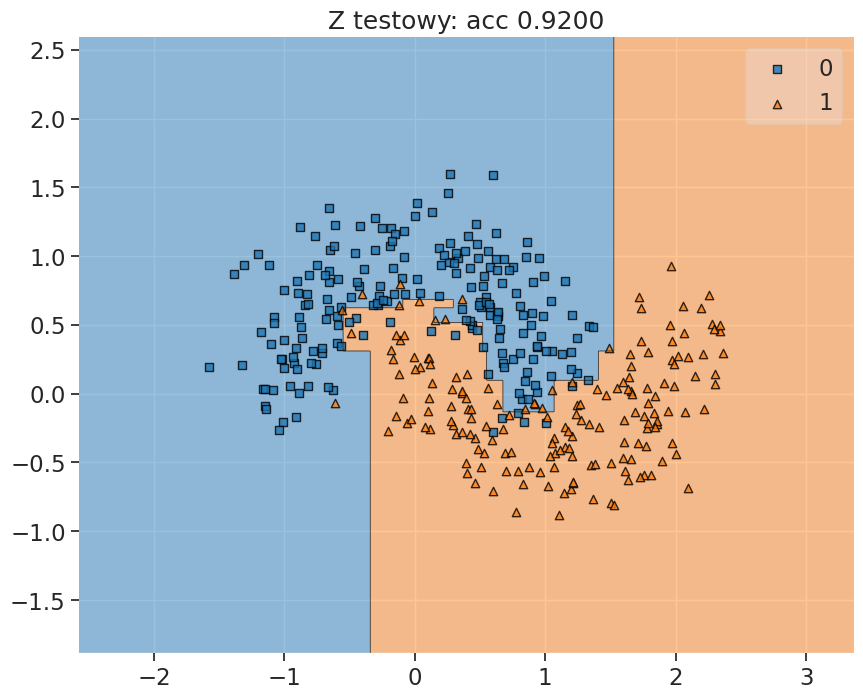

In [64]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Z testowy: acc {grid_search.score(X_test, y_test):.4f}')
plt.show()

Niestety model nie jest za dobry